### Computing with Short Step Quadrant Models (including Examples 4.3, 4.5, and 4.6)
Code to generate the groups, orbit sums, and diagonal expressions for the short step quadrant models with finite group.  
*Requirements: None*

In [1]:
# Enter the short step sets defining quadrant models with finite group
N = (0,1); SS = (0,-1); E = (1,0); W = (-1,0);
NE = (1,1); NW = (-1,1); SE = (1,-1); SW = (-1,-1);
HS1  = [N,SS,E,W]
HS2  = [NE,SE,NW,SW]
HS3  = [N,SS,NE,SE,NW,SW]
HS4  = [N,SS,E,W,NW,SW,SE,NE]
PD1  = [NE,NW,SS]
PD2  = [N,NW,NE,SS]
PD3  = [N,NE,NW,SE,SW]
PD4  = [NE,NW,E,W,SS]
PD5  = [N,NW,NE,E,W,SS]
PD6  = [N,E,W,NE,NW,SE,SW]
ND1  = [N,SE,SW]
ND2  = [N,SS,SE,SW]
ND3  = [NE,NW,SE,SW,SS]
ND4  = [N,E,W,SE,SW]
ND5  = [N,E,W,SS,SW,SE]
ND6  = [NE,NW,E,W,SE,SW,SS]
SP1  = [N,W,SE]
SP2  = [NW,SE,N,SS,E,W]
SP3  = [E,SE,W,NW]
ALG1 = [NE,W,SS]
ALG2 = [N,E,SW]
ALG3 = [N,NE,E,SS,SW,W]
ALG4 = [NE,E,SW,W]

In [2]:
# Define functions to plot a step set, generate the group, orbit sum, and diagonal expression for a walk
var('x,y,t,X,Y')

# Plot a step set S
def plot_steps(S):
    pt = sum([arrow((0,0),s) for s in S])
    pt.set_aspect_ratio(1)
    return pt

# Generate the group of a walk (up to a fixed number of elements)
def genGP(ST):
    # Get the characteristic polynomial of the model
    S = sum([X^i*Y^j for [i,j] in ST])

    # Define the rational maps for the lattice path model
    Am1 = S.coefficient(Y,-1);  A0 = S.coefficient(Y,0);  A1 = S.coefficient(Y,1)
    Bm1 = S.coefficient(X,-1);  B0 = S.coefficient(X,0);  B1 = S.coefficient(X,1)
    def Ψ(SS): return [L.subs(X=SS[0],Y=SS[1]).simplify() for L in [(1/X)*Bm1/B1,Y]]
    def Φ(SS): return [L.subs(X=SS[0],Y=SS[1]).simplify() for L in [X,(1/Y)*Am1/A1]]

    # Keep applying the maps until the set stabilizes or gets larger than a fixed bound
    List = [ ([],[x,y]) ]
    N = -1
    while (N != len(List)) and (len(List) < 10):
        N = len(List)
        for i in List:
            newI = true
            newP = true

            t2I = [k.simplify_full() for k in Ψ(i[1])]
            t2P = [k.simplify_full() for k in Φ(i[1])]

            for k in List:
                if k[1] == t2I:
                    newI = false
                if k[1] == t2P:
                    newP = false
                if not (newI or newP):
                    break

            if newI:
                List = List + [(['Ψ'] + i[0],t2I)]
            if newP:
                List = List + [(['Φ'] + i[0],t2P)]
            if len(List) >= 10:
                break

    if len(List) >= 10:
         print("Warning: Group size is larger than test bound, and may be infinite")
    return List

# Get orbit sum
def OrbitSum(ST):
    K = 1-t*add([x^i*y^j for [i,j] in ST])
    LST = genGP(ST)

    # Sum the Kernel Equation after it's acted upon by the group elements
    function('F')(Y)
    function('G')(X)
    function('Q')(X,Y)
    var('Kk')

    EQ = Kk*X*Y*Q(X,Y) == X*Y + F(Y) + G(X)
    orb_eq = add([EQ.substitute(X=k[0],Y=k[1])*(-1)^len(i) for [i,k] in LST]).simplify()

    # Return the right-hand side after dividing by the kernel
    orb_sum = (orb_eq.rhs()/(K*x*y)).factor()
    return orb_sum

# Convert orbit sum into rational diagonal expression
def RatDiag(ST):
    return (OrbitSum(ST).subs(x=1/x,y=1/y,t=x*y*t)/(1-x)/(1-y)).factor()

### Examples 4.3 and 4.5 (NSEW Walks)

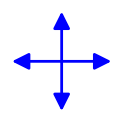

In [3]:
# These examples deal with the step set {N,S,E,W}
ST = (N,SS,E,W)
show(plot_steps(ST),figsize=2, axes=false)

In [4]:
# The group of this model consists of the maps taking (x,y) -> (x^(+/-1), y^(+/-1))
genGP(ST)

[([], [x, y]), (['Ψ'], [1/x, y]), (['Φ'], [x, 1/y]), (['Φ', 'Ψ'], [1/x, 1/y])]

In [5]:
# Taking an orbit sum of the kernel equation gives the following identity
K = 1-t*add([x^i*y^j for [i,j] in ST])
LST = genGP(ST)
function('Q')(X,Y)
var('Kk')
EQ = Kk*X*Y*Q(X,Y) == X*Y + t*Y*Q(0,y) + t*X*Q(x,0)
orb_eq = (add([(EQ.substitute(X=k[0],Y=k[1])*(-1)^len(i)/Kk).expand() for [i,k] in LST])).subs(Kk=K)
show(orb_eq.lhs() == orb_eq.rhs().factor())

x*y*Q(x, y) - x*Q(x, 1/y)/y - y*Q(1/x, y)/x + Q(1/x, 1/y)/(x*y) == -(x + 1)*(x - 1)*(y + 1)*(y - 1)/(t*x^2*y + t*x*y^2 + t*x + t*y - x*y)

In [6]:
# This gives the stated diagonal expression for the generating function. Using the RatDiag function above,
show("C(t) = ", LatexExpr("\\Delta{\\Big(}"), RatDiag(ST), LatexExpr("{\\Big)}"))

'C(t) = ' \Delta{\Big(} -(x + 1)*(y + 1)/(t*x^2*y + t*x*y^2 + t*x + t*y - 1) {\Big)}

### Example 4.6 (A Zero Orbit Model)

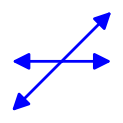

In [7]:
# Now we examine the group of Gessel's model
ST = [E,W,SW,NE]
show(plot_steps(ST),figsize=2, axes=false)

In [8]:
# As noted, the group contains the element (x,y) -> (x*y, 1/y) of odd order that fixes x*y
genGP(ST)

[([], [x, y]),
 (['Ψ'], [1/(x*y), y]),
 (['Φ'], [x, 1/(x^2*y)]),
 (['Φ', 'Ψ'], [1/(x*y), x^2*y]),
 (['Ψ', 'Φ'], [x*y, 1/(x^2*y)]),
 (['Ψ', 'Φ', 'Ψ'], [1/x, x^2*y]),
 (['Φ', 'Ψ', 'Φ'], [x*y, 1/y]),
 (['Φ', 'Ψ', 'Φ', 'Ψ'], [1/x, 1/y])]

In [9]:
# This implies an orbit sum of zero
K = 1-t*add([x^i*y^j for [i,j] in ST])
LST = genGP(ST)
EQ = Kk*X*Y*Q(X,Y) == X*Y + t*Y*Q(0,y) + t*X*Q(x,0)
orb_eq = (add([(EQ.substitute(X=k[0],Y=k[1])*(-1)^len(i)/Kk).expand() for [i,k] in LST])).subs(Kk=K)
show(orb_eq.lhs() == orb_eq.rhs().factor())

x*y*Q(x, y) - x*y*Q(1/x, x^2*y) - x*Q(x*y, 1/y) + x*Q(1/(x*y), x^2*y) + Q(x*y, 1/(x^2*y))/x - Q(1/(x*y), y)/x - Q(x, 1/(x^2*y))/(x*y) + Q(1/x, 1/y)/(x*y) == 0

### Diagonal Expressions for all Short Step Quadrant Models
Separated into the families studied in Chapters 4, 6, and 10

The generating function for the step set


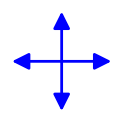

is the main power series diagonal of


-(x + 1)*(y + 1)/(t*x^2*y + t*x*y^2 + t*x + t*y - 1)

The generating function for the step set


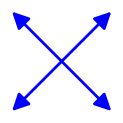

is the main power series diagonal of


-(x + 1)*(y + 1)/(t*x^2*y^2 + t*x^2 + t*y^2 + t - 1)

The generating function for the step set


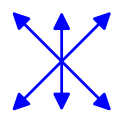

is the main power series diagonal of


-(x + 1)*(y + 1)/(t*x^2*y^2 + t*x*y^2 + t*x^2 + t*y^2 + t*x + t - 1)

The generating function for the step set


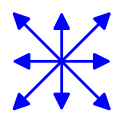

is the main power series diagonal of


-(x + 1)*(y + 1)/(t*x^2*y^2 + t*x^2*y + t*x*y^2 + t*x^2 + t*y^2 + t*x + t*y + t - 1)

In [10]:
# Highly symmetric models
for k in [HS1,HS2,HS3,HS4]:
    print("The generating function for the step set")
    show(plot_steps(k), figsize=2, axes=false)
    print("is the main power series diagonal of")
    show(RatDiag(k))

The generating function for the step set


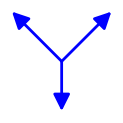

is the main power series diagonal of


-(x*y^2 - x^2 - 1)*(x + 1)/((t*x*y^2 + t*x^2 + t - 1)*(x^2 + 1)*(y - 1))

The generating function for the step set


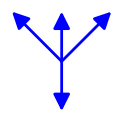

is the main power series diagonal of


-(x*y^2 - x^2 - x - 1)*(x + 1)/((t*x*y^2 + t*x^2 + t*x + t - 1)*(x^2 + x + 1)*(y - 1))

The generating function for the step set


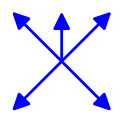

is the main power series diagonal of


-(x^2*y^2 - x^2 + y^2 - x - 1)*(x + 1)/((t*x^2*y^2 + t*x^2 + t*y^2 + t*x + t - 1)*(x^2 + x + 1)*(y - 1))

The generating function for the step set


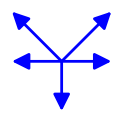

is the main power series diagonal of


-(x*y^2 - x^2 - 1)*(x + 1)/((t*x^2*y + t*x*y^2 + t*x^2 + t*y + t - 1)*(x^2 + 1)*(y - 1))

The generating function for the step set


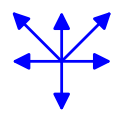

is the main power series diagonal of


-(x*y^2 - x^2 - x - 1)*(x + 1)/((t*x^2*y + t*x*y^2 + t*x^2 + t*x + t*y + t - 1)*(x^2 + x + 1)*(y - 1))

The generating function for the step set


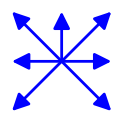

is the main power series diagonal of


-(x^2*y^2 - x^2 + y^2 - x - 1)*(x + 1)/((t*x^2*y^2 + t*x^2*y + t*x^2 + t*y^2 + t*x + t*y + t - 1)*(x^2 + x + 1)*(y - 1))

In [11]:
# Postive drift models
for k in [PD1,PD2,PD3,PD4,PD5,PD6]:
    print("The generating function for the step set")
    show(plot_steps(k), figsize=2, axes=false)
    print("is the main power series diagonal of")
    show(RatDiag(k))

The generating function for the step set


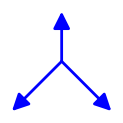

is the main power series diagonal of


-(x^2*y^2 + y^2 - x)*(x + 1)/((t*x^2*y^2 + t*y^2 + t*x - 1)*x*(y - 1))

The generating function for the step set


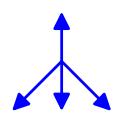

is the main power series diagonal of


-(x^2*y^2 + x*y^2 + y^2 - x)*(x + 1)/((t*x^2*y^2 + t*x*y^2 + t*y^2 + t*x - 1)*x*(y - 1))

The generating function for the step set


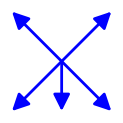

is the main power series diagonal of


-(x^2*y^2 + x*y^2 - x^2 + y^2 - 1)*(x + 1)/((t*x^2*y^2 + t*x*y^2 + t*x^2 + t*y^2 + t - 1)*(x^2 + 1)*(y - 1))

The generating function for the step set


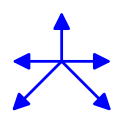

is the main power series diagonal of


-(x^2*y^2 + y^2 - x)*(x + 1)/((t*x^2*y^2 + t*x^2*y + t*y^2 + t*x + t*y - 1)*x*(y - 1))

The generating function for the step set


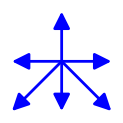

is the main power series diagonal of


-(x^2*y^2 + x*y^2 + y^2 - x)*(x + 1)/((t*x^2*y^2 + t*x^2*y + t*x*y^2 + t*y^2 + t*x + t*y - 1)*x*(y - 1))

The generating function for the step set


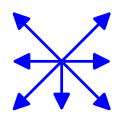

is the main power series diagonal of


-(x^2*y^2 + x*y^2 - x^2 + y^2 - 1)*(x + 1)/((t*x^2*y^2 + t*x^2*y + t*x*y^2 + t*x^2 + t*y^2 + t*y + t - 1)*(x^2 + 1)*(y - 1))

In [12]:
# Negative drift models
for k in [ND1,ND2,ND3,ND4,ND5,ND6]:
    print("The generating function for the step set")
    show(plot_steps(k), figsize=2, axes=false)
    print("is the main power series diagonal of")
    show(RatDiag(k))

The generating function for the step set


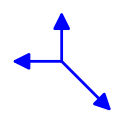

is the main power series diagonal of


(x^2 - y)*(x*y - 1)*(y^2 - x)/((t*x^2*y + t*y^2 + t*x - 1)*(x - 1)*x*(y - 1)*y)

The generating function for the step set


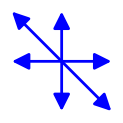

is the main power series diagonal of


(x^2 - y)*(x*y - 1)*(y^2 - x)/((t*x^2*y + t*x*y^2 + t*x^2 + t*y^2 + t*x + t*y - 1)*(x - 1)*x*(y - 1)*y)

The generating function for the step set


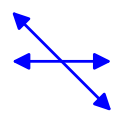

is the main power series diagonal of


(x^2 - y)*(x + y)*(x - y)*(x + 1)/((t*x^2*y + t*x^2 + t*y^2 + t*y - 1)*x^2*y)

In [13]:
for k in [SP1,SP2,SP3]:
    print("The generating function for the step set")
    show(plot_steps(k), figsize=2, axes=false)
    print("is the main power series diagonal of")
    show(RatDiag(k))